In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
# read exp_kriging_output.csv
doe = pd.read_csv("exp_mf_rbf_input.csv", index_col=0)
results = pd.read_csv("exp_mf_rbf_output.csv", index_col=0)

In [26]:
# merge doe and results
doe_results = pd.merge(doe, results, left_index=True, right_index=True)

In [27]:
doe_results

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,mf_rbf,2,25,Forrester_1a,1,finished,0.024505,0.006572,1.000000,0.063676
1,mf_rbf,4,25,Forrester_1a,1,finished,0.003820,0.000482,1.000000,0.190936
2,mf_rbf,6,25,Forrester_1a,1,finished,0.004130,0.000534,1.000000,0.102787
3,mf_rbf,8,25,Forrester_1a,1,finished,0.003473,0.000468,1.000000,0.131108
4,mf_rbf,10,25,Forrester_1a,1,finished,0.003697,0.000484,1.000000,0.129025
...,...,...,...,...,...,...,...,...,...,...
12995,mf_rbf,12,120,mf_Sixhump,5,finished,0.105302,0.016735,0.999854,1.057449
12996,mf_rbf,14,120,mf_Sixhump,5,finished,0.036900,0.005882,0.999982,0.997507
12997,mf_rbf,16,120,mf_Sixhump,5,finished,0.031754,0.004892,0.999987,1.219426
12998,mf_rbf,18,120,mf_Sixhump,5,finished,0.024592,0.003339,0.999994,1.405778


In [28]:
doe_results["problem"].values

array(['Forrester_1a', 'Forrester_1a', 'Forrester_1a', ..., 'mf_Sixhump',
       'mf_Sixhump', 'mf_Sixhump'], dtype=object)

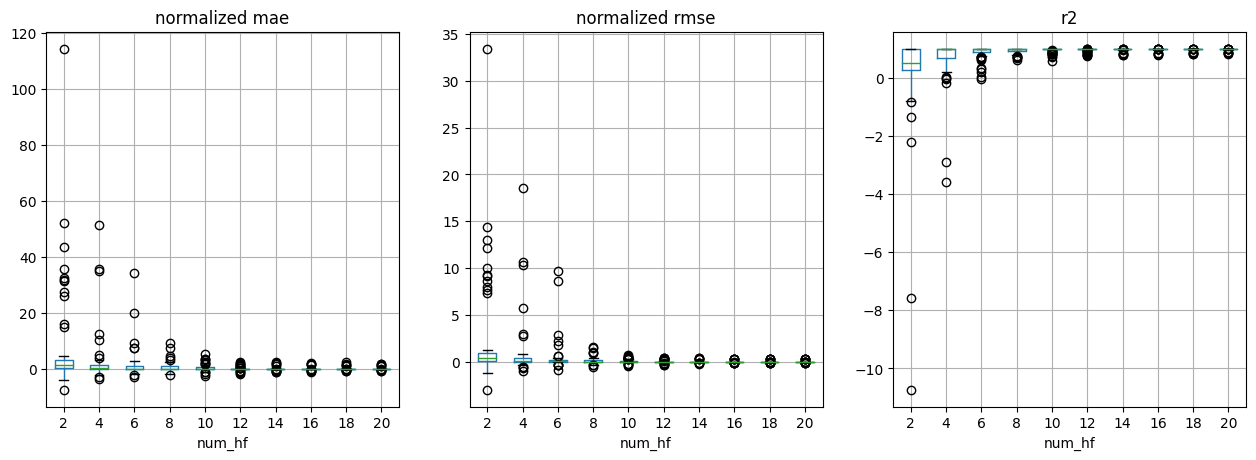

In [9]:
# get function name from problem column
# get a sub-dataframe with only specific problem
doe_results_1b = doe_results[doe_results["num_lf"] == 120]


# plot boxplot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.boxplot(column=["normalized_mae"], by="num_hf", ax=ax[0])
doe_results_1b.boxplot(column=["normalized_rmse"], by="num_hf", ax=ax[1])
doe_results_1b.boxplot(column=["r2"], by="num_hf", ax=ax[2])
ax[0].set_title("normalized mae")
ax[1].set_title("normalized rmse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

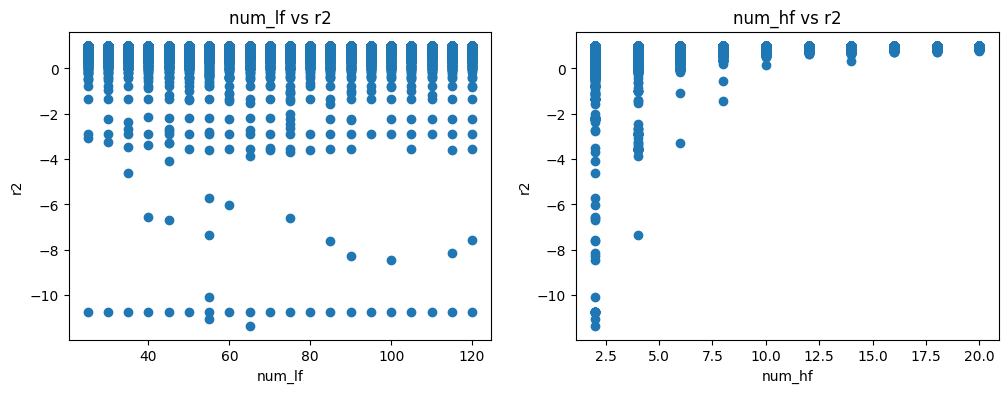

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for num_lf vs r2
ax1.scatter(doe_results["num_lf"], doe_results["r2"])
ax1.set_title("num_lf vs r2")
ax1.set_xlabel("num_lf")
ax1.set_ylabel("r2")

# Scatter plot for num_hf vs r2
ax2.scatter(doe_results["num_hf"], doe_results["r2"])
ax2.set_title("num_hf vs r2")
ax2.set_xlabel("num_hf")
ax2.set_ylabel("r2")

plt.show()

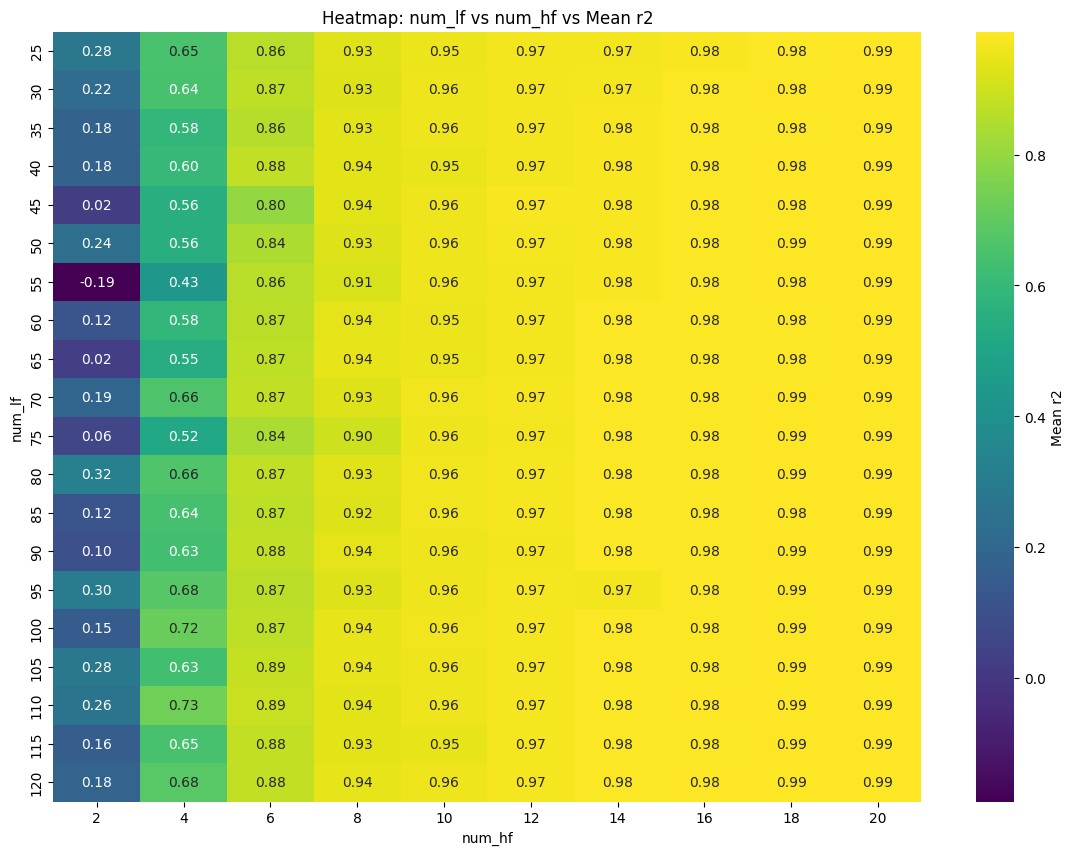

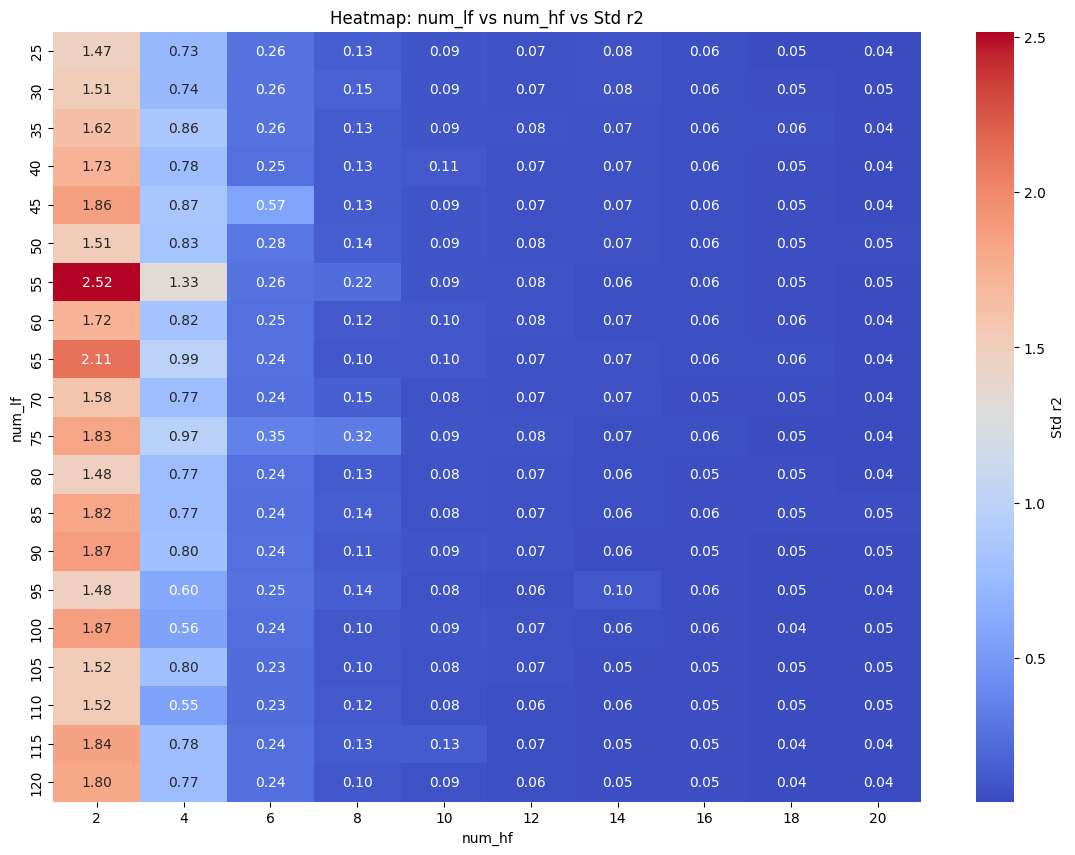

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = doe_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a heatmap with mean values
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=True,
    cmap="viridis",
    fmt=".2f",
    cbar_kws={"label": "Mean r2"},
)
plt.title("Heatmap: num_lf vs num_hf vs Mean r2")
plt.xlabel("num_hf")
plt.ylabel("num_lf")
plt.show()

# Create a heatmap with std values
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["std"],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Std r2"},
)
plt.title("Heatmap: num_lf vs num_hf vs Std r2")
plt.xlabel("num_hf")
plt.ylabel("num_lf")
plt.show()

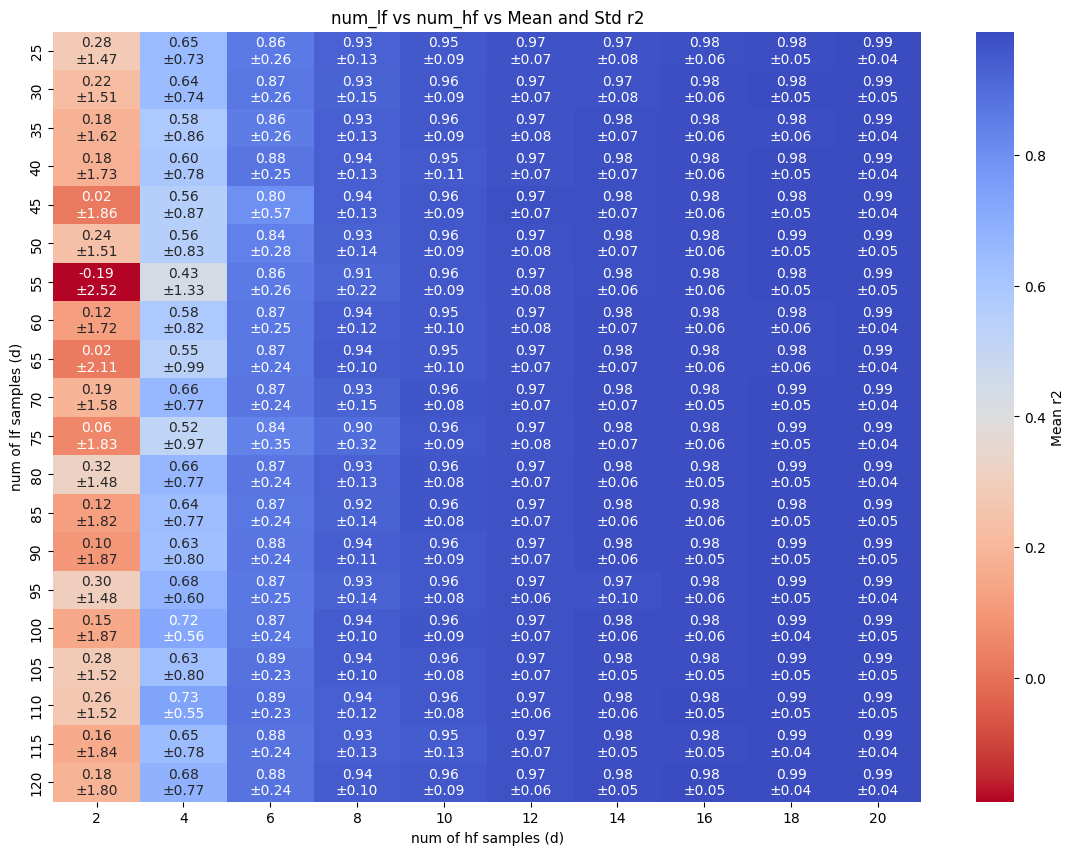

In [41]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = doe_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap("{:.2f}".format).astype(str).values
annotations_std = "±" + pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()